In [ ]:
'''
File name: Project.ipynb
Author: Paul de Fontenay, Arnault Monoyer, Jules Orsat and Matthieu Sayar
Date created: 01/11/2022
Date last modified: 03/11/2022
Last modification by:
Python Version: 3.9.13
'''

'\nFile name: Project.ipynb\nAuthor: Paul de Fontenay, Arnault Monoyer, Jules Orsat and Matthieu Sayar\nDate created: 01/11/2022\nDate last modified: 03/11/2022\nLast modification by:\nPython Version: 3.9.13\n'

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt

DATA_FOLDER = 'MovieSummaries/'

In [ ]:
moviedata = pd.read_csv(DATA_FOLDER + 'movie.metadata.tsv', sep = '\t', index_col='wiki_id' , header=None, names=('wiki_id','freebase_id','movie_name','release','revenue','runtime','languages','countries','genres'))
charadata = pd.read_csv(DATA_FOLDER + 'character.metadata.tsv', sep = '\t', header=None, names=('wiki_id','freebase_id','character_name','actor_dob','actor_gender','actor_height','actor_ethnicity','actor_name','actor_age','freebase_chara_map'))
plots =  pd.read_csv(DATA_FOLDER + 'plot_summaries.txt', sep = '\t', header=None, names=('wiki_id','plot'))

In [ ]:
charadata.set_index('wiki_id',inplace=True)
plots.set_index('wiki_id',inplace=True)

moviedata_filtered = moviedata.loc[moviedata.index.isin(plots.index)]

In [ ]:
moviedata_filtered.isna().sum()

freebase_id        0
movie_name         0
release         2618
revenue        34617
runtime         6624
languages          0
countries          0
genres             0
dtype: int64

In [ ]:
moviedata_filtered.loc[:,'genres'] = moviedata_filtered['genres'].apply(lambda x : x.replace(':', ','))

moviedata_filtered['genres'] = moviedata_filtered['genres'].apply(eval)
moviedata_filtered['genres'] = moviedata_filtered['genres'].apply(lambda x: list(x))
moviedata_filtered['genres'] = moviedata_filtered['genres'].apply(lambda y: list(filter(lambda x: not x.startswith('/m'), y)))

C:\Users\sayar\AppData\Local\Temp\ipykernel_2092\711675932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moviedata_filtered.loc[:,'genres'] = moviedata_filtered['genres'].apply(lambda x : x.replace(':', ','))
C:\Users\sayar\AppData\Local\Temp\ipykernel_2092\711675932.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moviedata_filtered['genres'] = moviedata_filtered['genres'].apply(eval)
C:\Users\sayar\AppData\Local\Temp\ipykernel_2092\711675932.py:4: SettingWithCopyWarning: 
A value is trying to be 

In [ ]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

<AxesSubplot:>

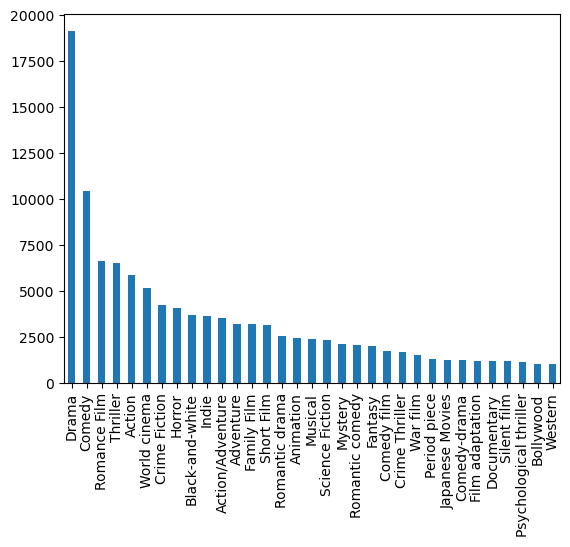

In [ ]:
a = to_1D(moviedata_filtered['genres']).value_counts()

a = a[a>1000]

a.plot(kind='bar')

In [ ]:
selected_genres = ['Comedy','Action','Horror']

for genre in selected_genres:
    moviedata_filtered[genre] = moviedata_filtered['genres'].apply(lambda x: 1 if genre in x else 0)

moviedata_filtered['unique_genre'] = moviedata_filtered.loc[:,selected_genres].sum(axis = 1)

C:\Users\sayar\AppData\Local\Temp\ipykernel_2092\1853560384.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moviedata_filtered[genre] = moviedata_filtered['genres'].apply(lambda x: 1 if genre in x else 0)
C:\Users\sayar\AppData\Local\Temp\ipykernel_2092\1853560384.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moviedata_filtered[genre] = moviedata_filtered['genres'].apply(lambda x: 1 if genre in x else 0)
C:\Users\sayar\AppData\Local\Temp\ipykernel_2092\1853560384.py:4: SettingWithCopyWarning: 
A v

In [ ]:
unique_genre = moviedata_filtered.drop(moviedata_filtered[moviedata_filtered['unique_genre'] != 1].index)

<AxesSubplot:>

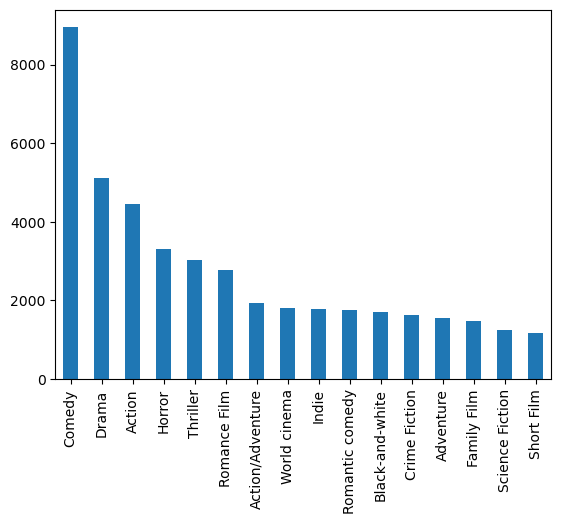

In [ ]:
a = to_1D(unique_genre['genres']).value_counts()

a = a[a>1000]

a.plot(kind='bar')

Test